## Karakas 2010 net yields from MCMC

Run the multi_star_optimization script to calculate the posterior parameter set with Karakas 10 yield (via MCMC), using the new model error beta function marginalization.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from Chempy.wrapper import multi_star_optimization # (there will be many gas reservoir/upper border errors but these can be ignored)
%timeit -n 1 -r 1 multi_star_optimization()

# This was done on a different PC but results are shown below

1.44405552172 -1.51489443104
posterior -1, -100, -200 -1.51489443104 -1.53393613939 -1.26114312589
posterior 0, 100, 200 1.44405552172 -1.37090752971 -1.43192489745
calculation so far took 3788.451721906662  seconds
1 loop, best of 1: 1h 4min 54s per loop

This takes a time of 1 hour, 4 min, 54 seconds to run. Data is in the mcmc/ folder - copy this into the karakas10 folder to save. Output is shown above.

In [10]:
## Now restructure the chain

from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10/')

blob shape =  (64, 303, 22, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-1.51489443104 1.44405552172
Mean posteriors after the burn-in tail is cut out:
-1.51489443104 -1.59169875752
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
1.42550044505 -9.29678471566
Highest posterior was obtained at parameters:  [[-2.5882797  -2.79484145 -0.78438053 -0.28514599  0.56036285  0.53814161]]
Number of unique posterior values:  2573
Inferred marginalized parameter distributions are:
0 -2.57935719605 +- 0.118345442445
1 -2.82232215508 +- 0.152689627696
2 -0.843873449484 +- 0.287431044791
3 -0.289613380669 +- 0.265267644326
4 0.556672616494 +- 0.098909488157
5 0.504011697614 +- 0.103684580087


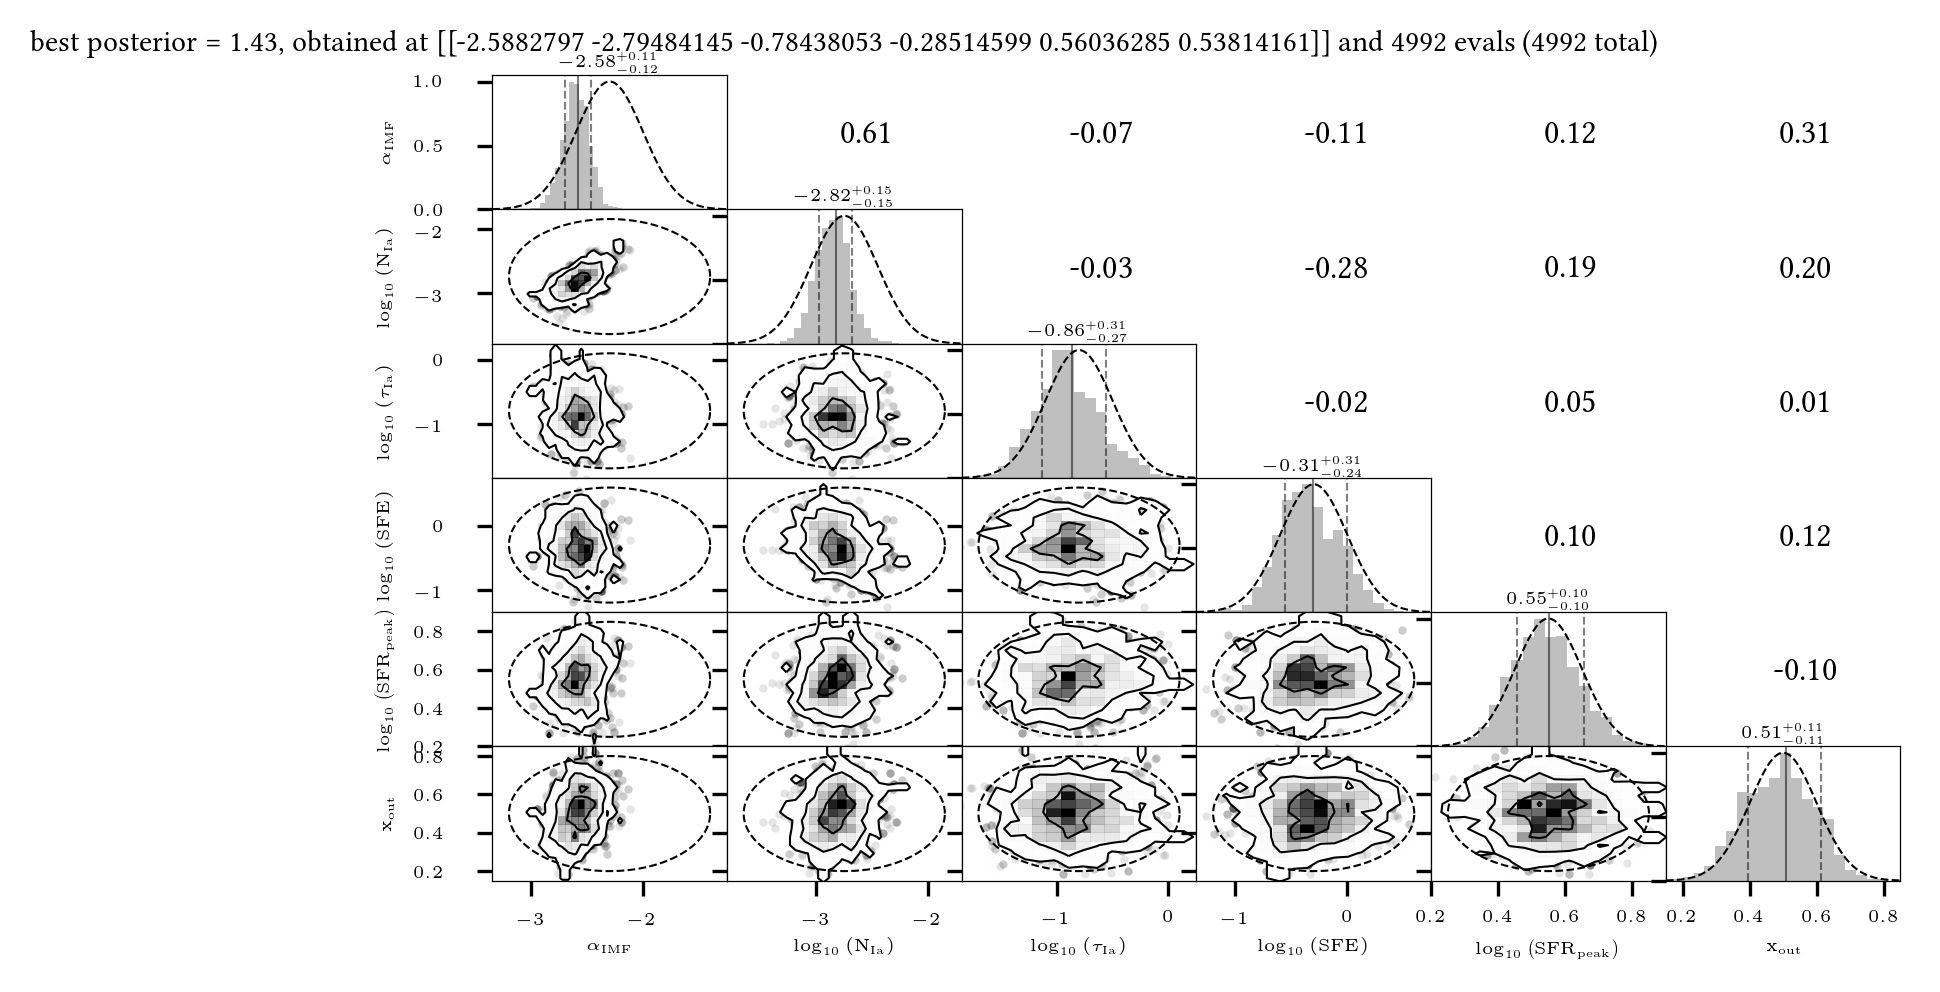

In [11]:
## Plot the posterior and prior values and correlation grid
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas10/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [20]:
# Create output for best-fit parameters
from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.58,-2.82,-0.86,-0.31,0.55,0.51]) # Parameters found by model
a = extract_parameters_and_priors(a.p0, a) # To update to new model
abundances, names = cem2(a) # predict abundances

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:159: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


In [21]:
# Load in proto-sun abundances and errors (remove last value (solar age))
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance = []
proto_sun_error = []
model_abundance = []
#names = np.asarray(names) # For compatibility

# Calculate model abundance in same order as proto-sun
for i,item in enumerate(proto_sun.dtype.names[:-1]):
    for j,jtem in enumerate(names):
        if jtem == item:
            model_abundance.append(abundances[j])
    #model_abundance.append(abundances[np.where(names==item)])
    proto_sun_abundance.append(proto_sun[0][i])
    proto_sun_error.append(proto_sun[1][i])
    
# Load abundance names ([X/Fe]) in correct order
abundance_names = []
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')

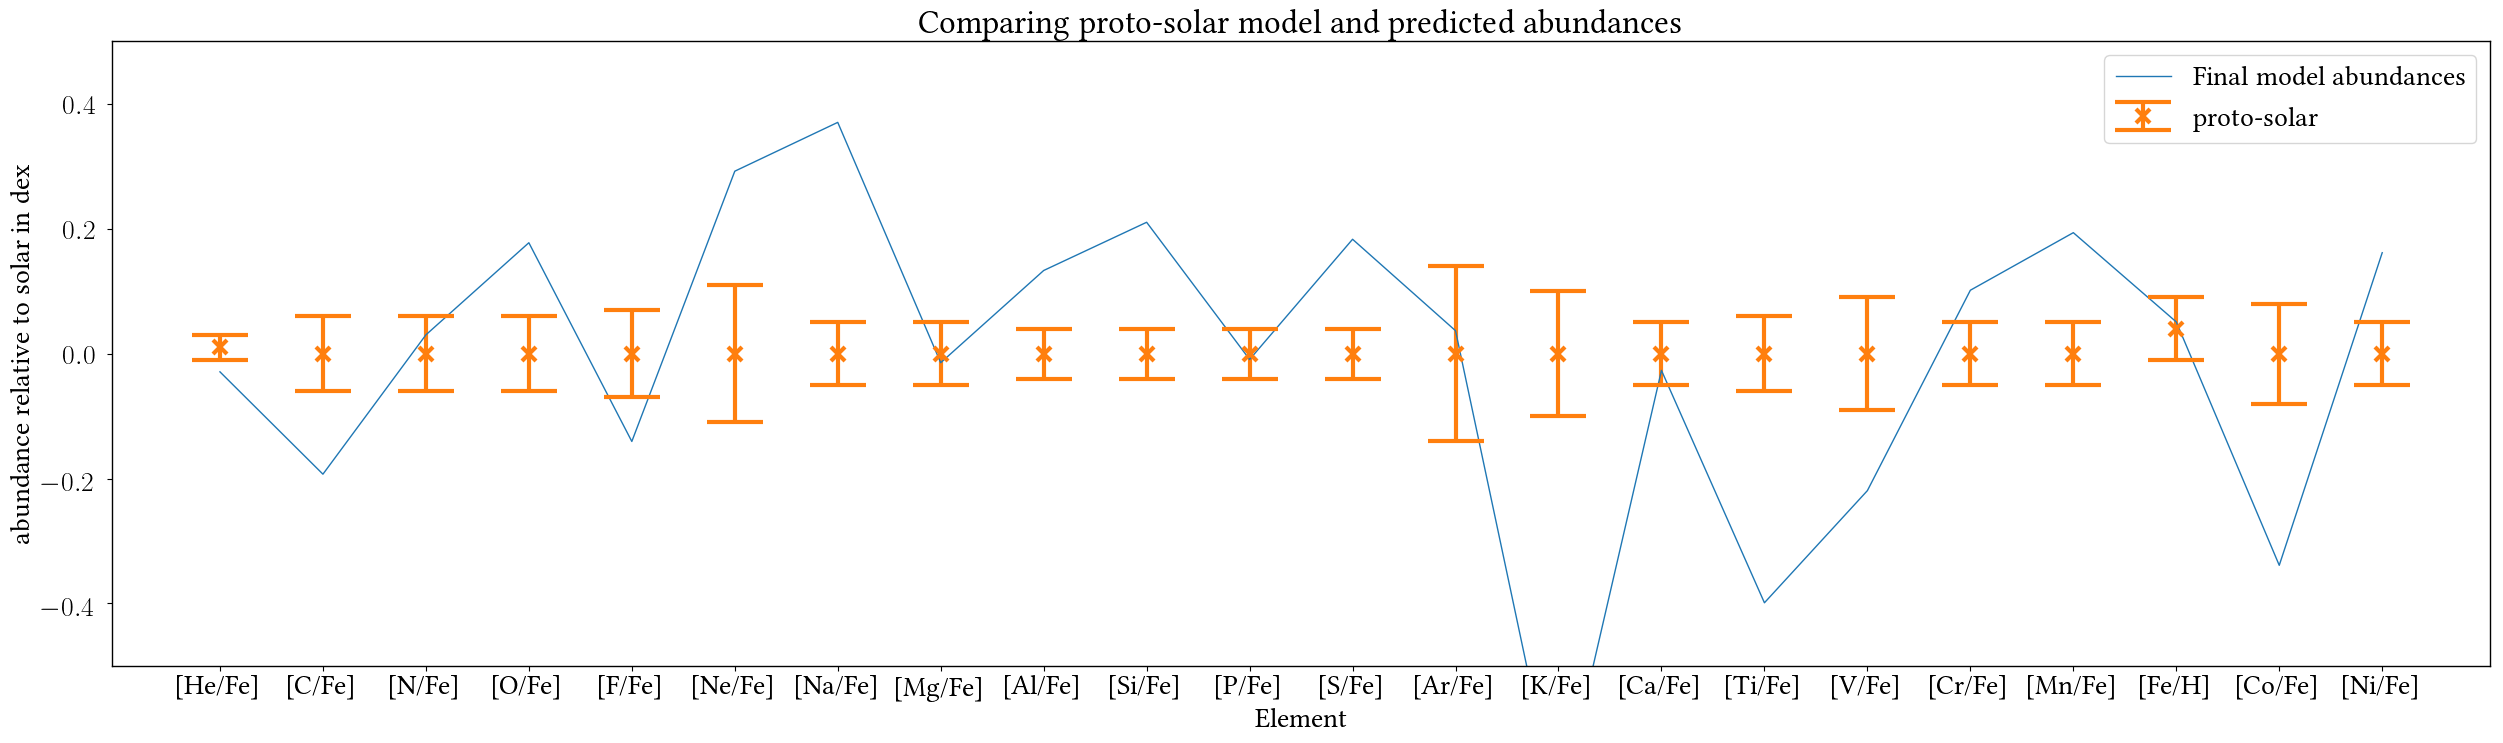

In [22]:
# Plot figure comparing model and observational abundancess
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 20
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
plt.plot(np.arange(len(abundance_names)),model_abundance,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(abundance_names)),proto_sun_abundance,xerr=None,yerr=proto_sun_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='proto-solar')
plt.ylim((-0.5,0.5))
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")
plt.title("Comparing proto-solar model and predicted abundances")
plt.legend()
savefig('karakas10/AbundancePlot')

## Rerun without error optimization
Set model errors to zero to test with no error marginalization, and stored in karakas10_zero_error

#### Change these settings in the parameter.py file, since multi_star_optimization resets parameters to defaults.

a.error_marginalization = False
a.zero_model_error = True

In [23]:
om Chempy.wrapper import multi_star_optimization # Run code without error optimization
# errors in abundance['Fe'] are fine, since initial Fe mass is zero, so abundance is -inf
%timeit -n 1 -r 1 multi_star_optimization() # Time running - use -n, -r to set only 1 iteration of code
# (Run on a faster PC)

Populating the interactive namespace from numpy and matplotlib


**Output from multi_star_optimization is shown below** - time is 1h 4min 58s

-85.3060153739 -86.2401397753
posterior -1, -100, -200 -86.2401397753 -86.3245589017 -85.9632092474
posterior 0, 100, 200 -85.3060153739 -86.0016467311 -86.1845593497
calculation so far took 3591.1689043045044  seconds
step  302 of  1000
-85.3060153739 -86.470086954
posterior -1, -100, -200 -86.470086954 -86.2141620897 -86.0988536579
posterior 0, 100, 200 -85.3060153739 -86.0016467311 -86.1845593497
calculation so far took 3602.9518530368805  seconds
1 loop, best of 1: 1h 4min 58s per loop


In [5]:
## Now restructure the chain

from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10_zero_error/')

blob shape =  (64, 303, 22, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-86.470086954 -85.3060153739
Mean posteriors after the burn-in tail is cut out:
-86.470086954 -86.4301972379
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
-83.406933793 -97.7149046464
Highest posterior was obtained at parameters:  [[-2.81650001 -3.09279738 -0.71551012 -0.3070466   0.40369205  0.35295788]]
Number of unique posterior values:  2489
Inferred marginalized parameter distributions are:
0 -2.80044768806 +- 0.0477896985216
1 -3.06761644287 +- 0.0983004189356
2 -0.823700514436 +- 0.309972578189
3 -0.259356646202 +- 0.106207689159
4 0.42292732182 +- 0.0712252101051
5 0.363100221775 +- 0.0833858353826


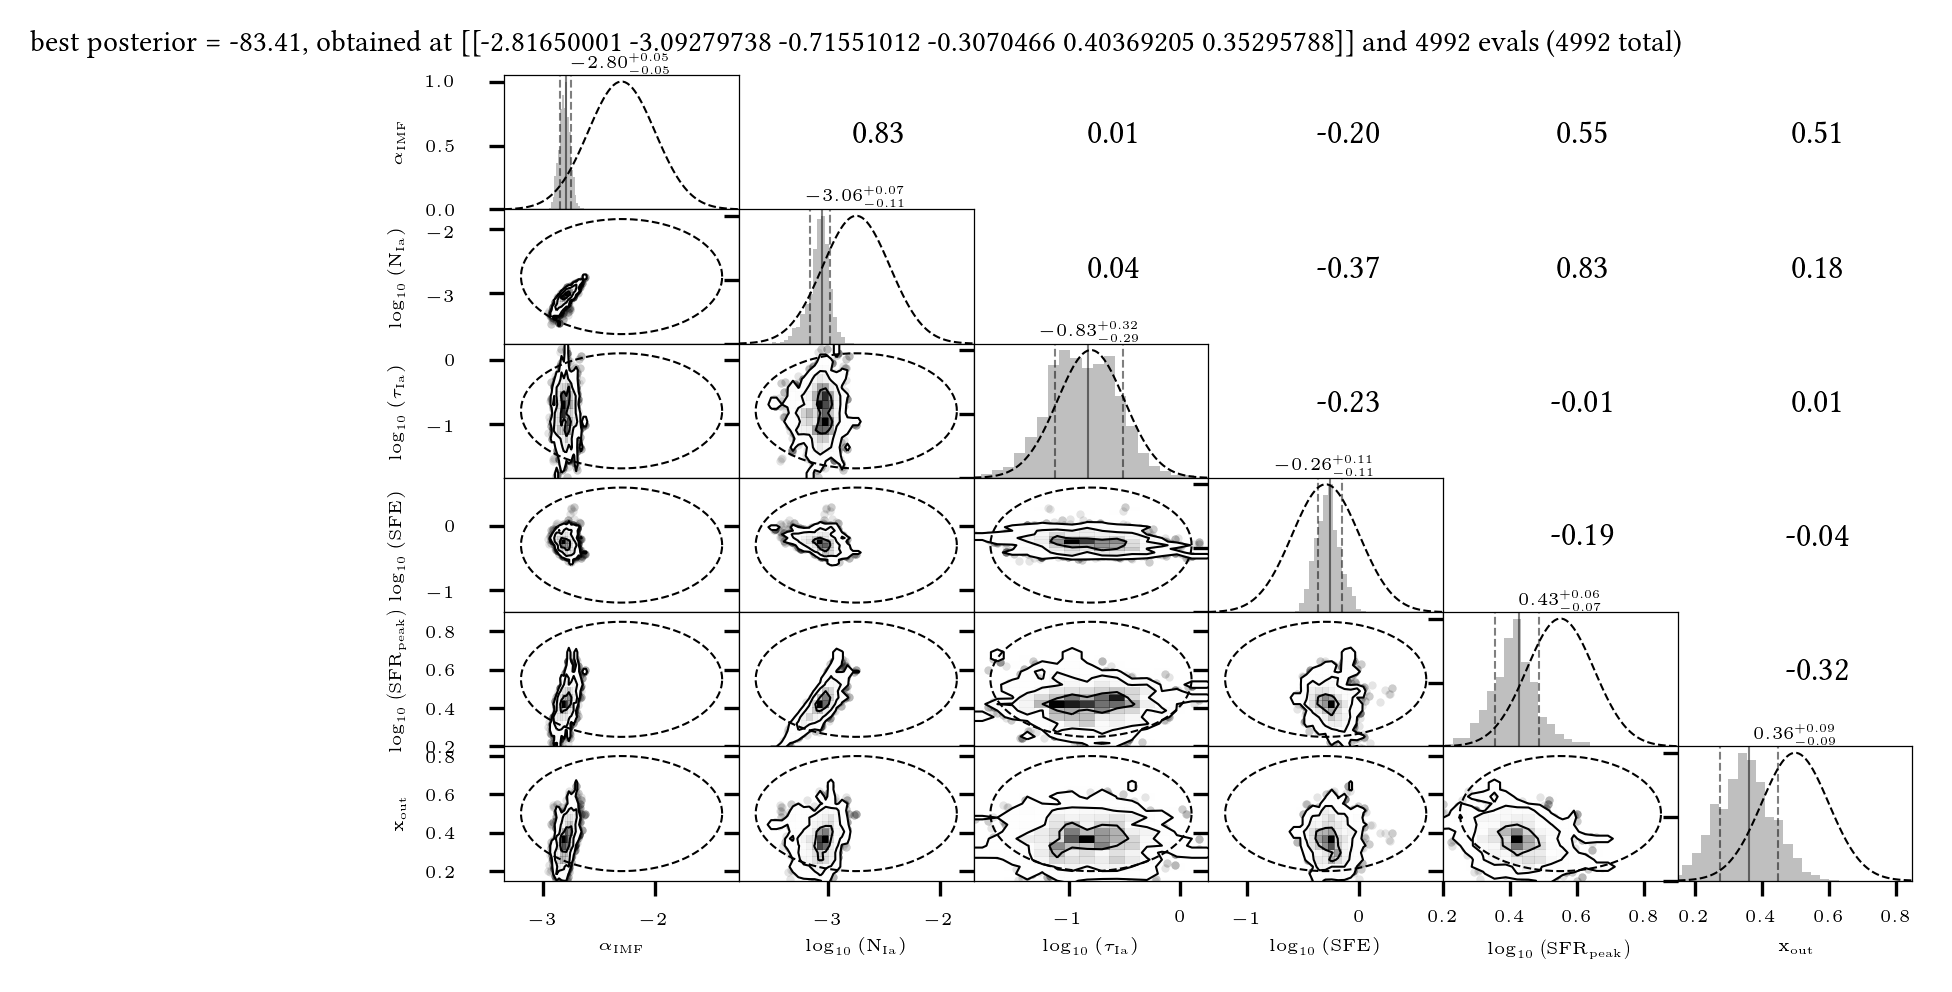

In [6]:
## Plot the posterior and prior values and correlation grid
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas10_zero_error/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [7]:
# Create output for best-fit parameters
from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.80,-3.06,-0.83,-0.26,0.43,0.36]) # Parameters found by model
a = extract_parameters_and_priors(a.p0, a) # To update to new model
abundances, names = cem2(a) # predict abundances

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:159: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


In [8]:
# Load in proto-sun abundances and errors (remove last value (solar age))
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance = []
proto_sun_error = []
model_abundance = []

# Calculate model abundance in same order as proto-sun
for i,item in enumerate(proto_sun.dtype.names[:-1]):
    for j,jtem in enumerate(names):
        if jtem == item:
            model_abundance.append(abundances[j])
    #model_abundance.append(abundances[np.where(names==item)])
    proto_sun_abundance.append(proto_sun[0][i])
    proto_sun_error.append(proto_sun[1][i])
    
# Load abundance names ([X/Fe]) in correct order
abundance_names = []
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')

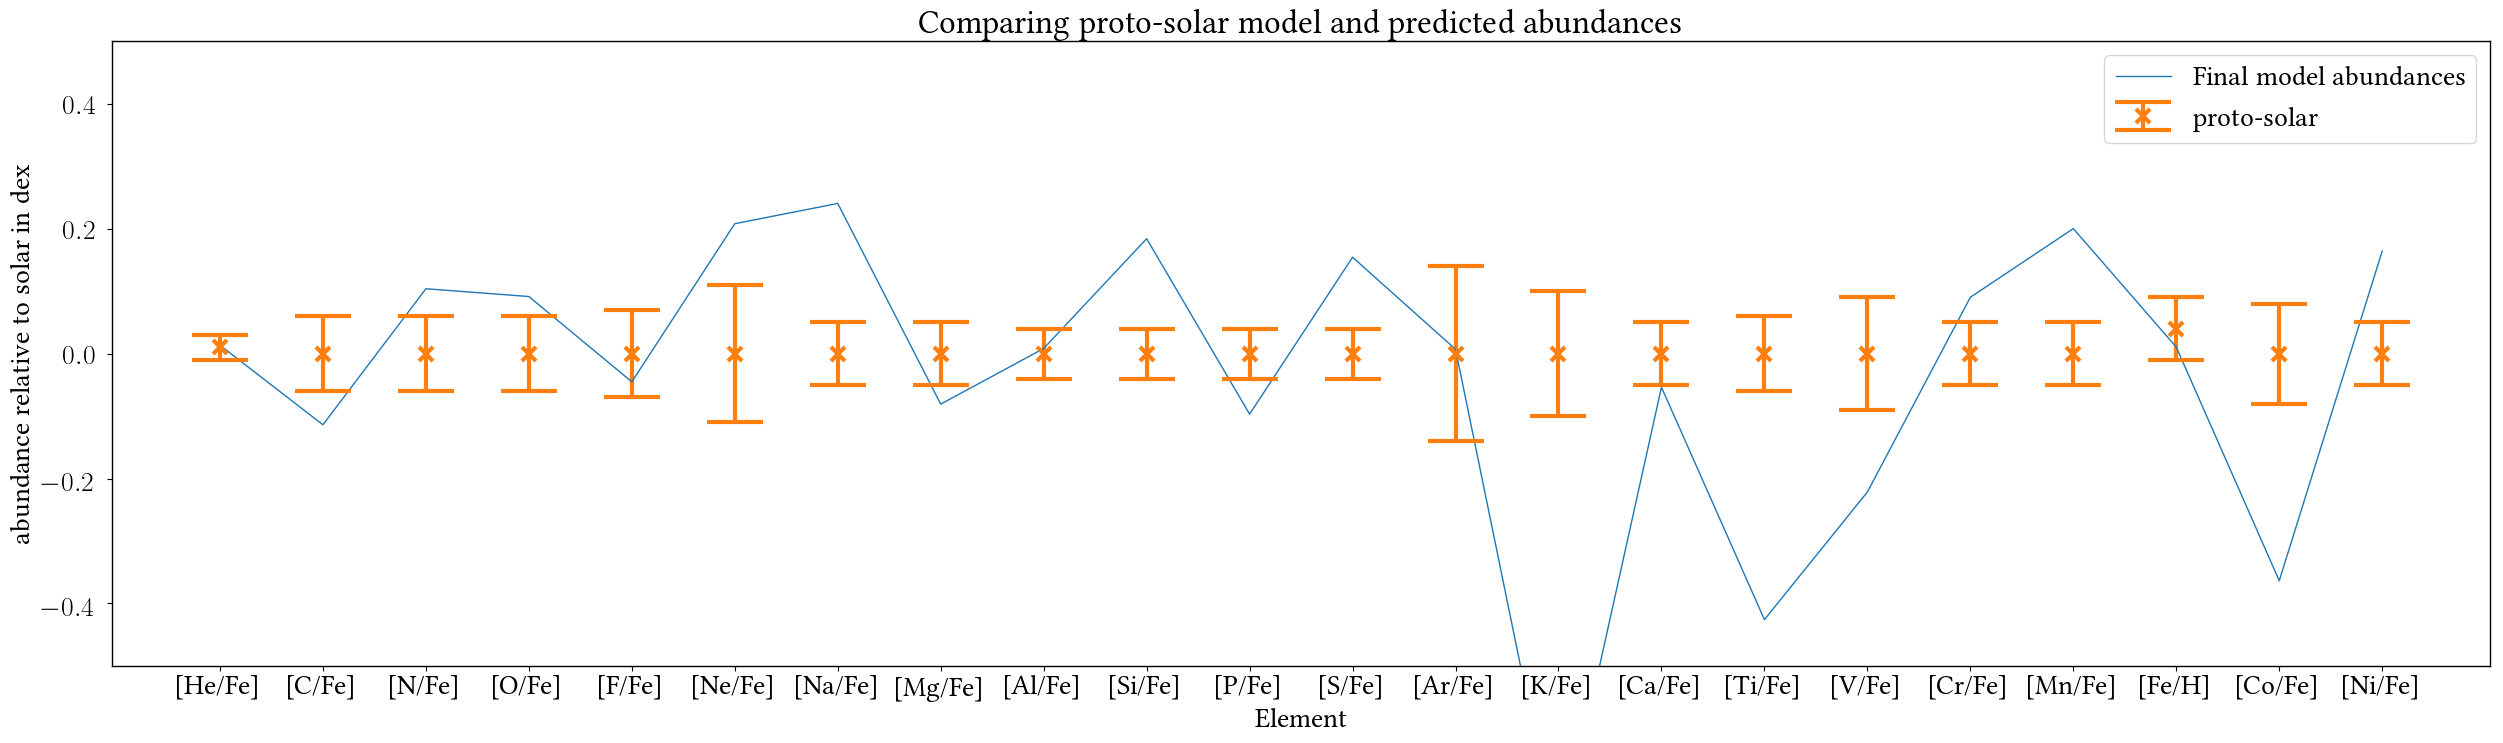

In [9]:
# Plot figure
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 20
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
plt.plot(np.arange(len(abundance_names)),model_abundance,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(abundance_names)),proto_sun_abundance,xerr=None,yerr=proto_sun_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='proto-solar')
plt.ylim((-0.5,0.5))
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")
plt.title("Comparing proto-solar model and predicted abundances")
plt.legend()
savefig('karakas10_zero_error/AbundancePlot')